In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pyvista as pv
from scipy.interpolate import RegularGridInterpolator


In [3]:
# pyvista has to be installed to properly run the rest of the code
#only run this if you haven't used pyvista before

#%pip install pyvista

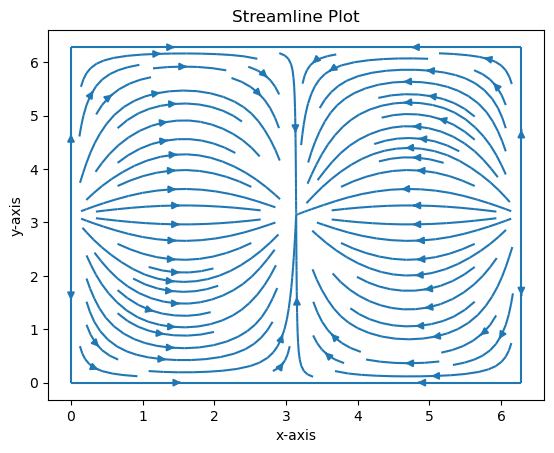

In [4]:
# Task 1: generate a 2D Streamline Plot and visualize it
#note that we already assume z = 0 before defining the function

#boundaries of the grid
L = 2 * np.pi #the same in x and y direction

#number of grid points
Ngrid = 10 #the same in x and y direction

def visualize_streamlines(L, Ngrid):    
    #defining the 2D grid size
    x, y = [np.linspace(0, L, Ngrid)]*2

    x_grid, y_grid = np.meshgrid(x, y)

    #defining velocity components
    v = np.sin(x_grid)
    w = -np.cos(x_grid) * np.sin(y_grid)


    #plotting of the quiver plot
    plt.figure()
    plt.streamplot(x_grid, y_grid, v, w, cmap=plt.cm.viridis)
    plt.xlabel("x-axis")
    plt.ylabel("y-axis")
    plt.title("Streamline Plot")
    plt.savefig('2D plot.jpeg') 
    plt.show()

grid = visualize_streamlines(L, Ngrid)

c:\Users\HP\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


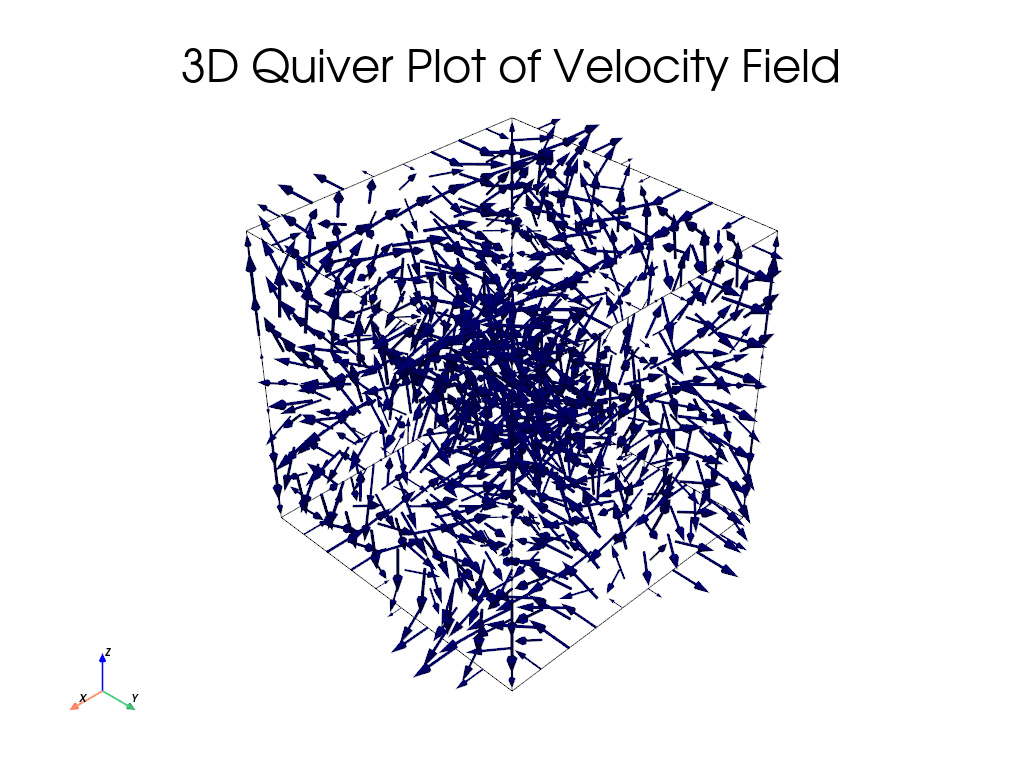

In [5]:
# Task 1: generate a 3D plot and visualize it
L = 2*np.pi
Ngrid = 10 #Ngrid must be > 3

def generate_flow_field(L, Ngrid):

    x, y, z = [np.linspace(0, L, Ngrid)]*3

    # Create a 3D grid
    x_grid, y_grid, z_grid = np.meshgrid(x, y, z)

    #Define the separate velocity components
    u = -np.cos(y_grid) * np.sin(z_grid)
    v = np.cos(z_grid) * np.sin(x_grid)
    w = -np.cos(x_grid) * np.sin(y_grid)

    # Create a pyvista grid
    grid = pv.StructuredGrid(x_grid, y_grid, z_grid)

    # Add the velocity components to the grid
    grid['velocity'] = np.stack((u, v, w), axis=-1).reshape(-1, 3)

    return grid

grid = generate_flow_field(L, Ngrid)
# Create a pyvista plotter
plotter = pv.Plotter()

# Add quiver plot to the plotter
plotter.add_arrows(grid.points, grid['velocity'], mag=1, color='darkblue')

# Add the grid to the plotter for context
plotter.add_mesh(grid.outline(), color='black')

# Add title, axes and set background color
plotter.add_title("3D Quiver Plot of Velocity Field")
plotter.add_axes()
plotter.set_background('white')

# Show the plot
plotter.screenshot('3D plot.jpeg')
plotter.show()


In [6]:
# Task 2: generate Npts particles at random locations

#boundaries for particle initialization
lower_bnd = np.pi/2 
upper_bnd = 3*np.pi/2
Npts = 3 #number of particles

def random_particles(Npts, lower_bnd, upper_bnd):

    #genetare indices x, y and z for Npts particles bewteen the lower and upper given boundary
    particles = np.random.uniform(low=[lower_bnd, lower_bnd, lower_bnd], high=[upper_bnd, upper_bnd, upper_bnd], size=(Npts, 3))
  
    return particles

particles = random_particles(Npts, lower_bnd, upper_bnd)
#print(particles)

In [7]:
# Task 2: Interpolate for velocities at positions of random particles

def interpolate_velocity(grid, particles):
    
    original_coordinates = grid.points #extract grid points as an array from grid
    x = np.sort(np.unique(original_coordinates[:,0]))
    y = np.sort(np.unique(original_coordinates[:,1]))
    z = np.sort(np.unique(original_coordinates[:,2]))

    velocities = grid['velocity']

    f_u = RegularGridInterpolator((x,y, z), velocities[:,0].reshape(len(x), len(y), len(z)))
    f_v = RegularGridInterpolator((x,y,z), velocities[:,1].reshape(len(x), len(y), len(z)))
    f_w = RegularGridInterpolator((x, y, z), velocities[:,2].reshape(len(x), len(y), len(z)))

    u_interp = f_u(particles)
    v_interp = f_v(particles)
    w_interp = f_w(particles)

    interpolated_velocities = np.column_stack((u_interp, v_interp, w_interp))

    return interpolated_velocities

c:\Users\HP\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


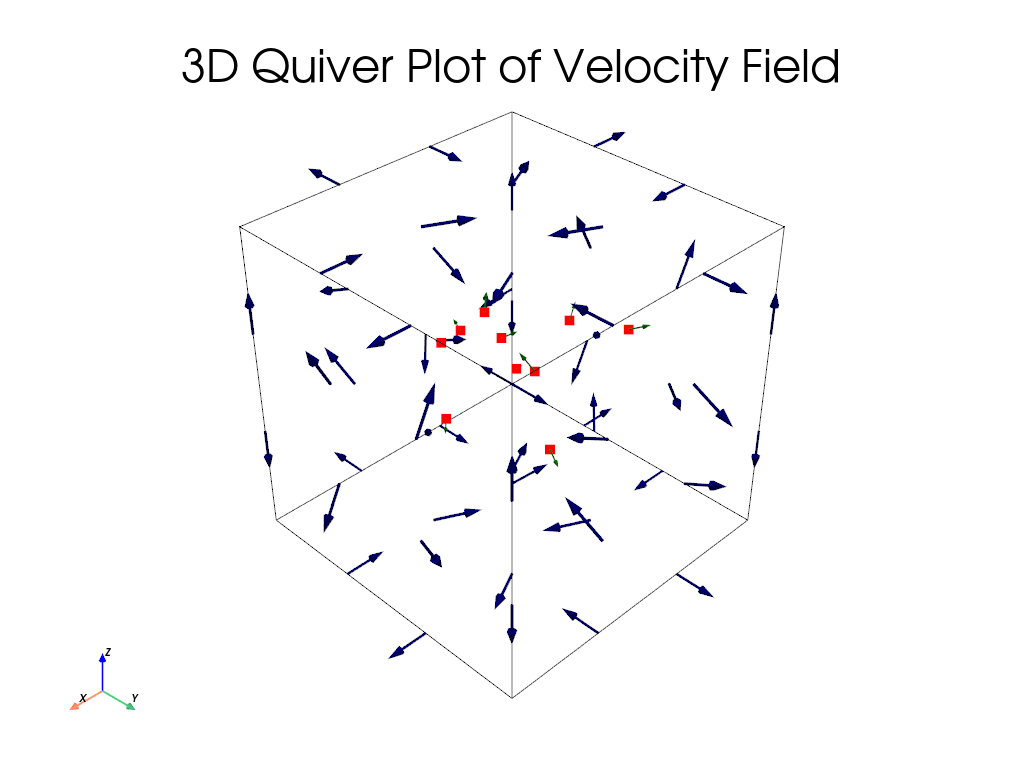

In [8]:
# Task 2: Visualize the randomly generated particles on the 3D grid and the interpolated velocities of the particles

L = 2 * np.pi
Ngrid = 4
lower_bnd = np.pi/2 
upper_bnd = 3*np.pi/2
Npts = 10 #number of particles

particles = random_particles(Npts, lower_bnd, upper_bnd)
grid = generate_flow_field(L, Ngrid)
interpolated_velocities = interpolate_velocity(grid, particles)

# Create a pyvista plotter
plotter = pv.Plotter()

# Plot the random particles
plotter.add_points(particles, color="red", point_size=10)

# Add quiver plot to the plotter
plotter.add_arrows(grid.points, grid['velocity'], mag=1, color='darkblue')
    #plotter.add_arrows(particles_pvista.points, interp_velocity, mag=1, color='red')

#add the interpolated velocities into the grid
coordinate_velocities_list = zip(particles, interpolated_velocities)

for (particle, velocity) in coordinate_velocities_list:
    plotter.add_arrows(particle, velocity, mag=1, color='green')
    #print(f"particle {i}:{particle}, velocity {i}: {velocity}")

# Add the grid to the plotter for context
plotter.add_mesh(grid.outline(), color='black')

# Add title, axes and set background color
plotter.add_title("3D Quiver Plot of Velocity Field")
plotter.add_axes()
plotter.set_background('white')

# Display the plot
plotter.show()

In [9]:
# Task 2: Calculate the error of the interpolated values

def exact_velocity(particles): #calculate the exact velocity values at the particle points
    exact_u = - np.cos(particles[:, 1])*np.sin(particles[:,2])
    exact_v = np.cos(particles[:, 2])*np.sin(particles[:,0])
    exact_w = -np.cos(particles[:,0])*np.sin(particles[:,1])
    exact_velocities = np.column_stack((exact_u, exact_v, exact_w))
    return exact_velocities

exact_velocities = exact_velocity(particles)

def calculate_error(interpolated_velocities, exact_velocities):
    error = np.linalg.norm(exact_velocities - interpolated_velocities, axis=1)
    average_error = sum(error)/len(error)
    return error, average_error

print(calculate_error(interpolated_velocities, exact_velocities))





#plot error(Ngrid):

#x_axis = np.linspace(0, 10000, 10) #values of Ngrid
#y_axis = [] #error values

#for N in np.linspace(10, 10000, 10): #cycle through multiple Ngrid values
 #   grid = generate_flow_field(L, int(N))
  #  interpolated_velocities = interpolate_velocity(grid, particles)
   # exact_velocities = exact_velocity(particles)
    #error = calculate_error(interpolated_velocities, exact_velocities)
    #y_axis.append(error)


(array([0.47034396, 1.08181143, 0.77900501, 0.63886715, 0.21166681,
       0.99205113, 0.90921795, 1.27517936, 0.9755388 , 0.73286444]), 0.8066546021717244)


In [16]:
# Task 2: Observe how the error chances as Ngrid increases

particles = random_particles(3, lower_bnd, upper_bnd)
#x_axis = np.round(np.logspace(1, 2, num=10)).astype(int) #integers logarithmically spaced from 10 to 1000
x_axis = range(10, 100, 10)
print(x_axis)
y_axis = [] #average errors

for N in x_axis:
    grid = generate_flow_field(L, N)
    interpolated_velocities = interpolate_velocity(grid, particles)
    exact_velocities = exact_velocity(particles)
    _, average_error = calculate_error(interpolated_velocities, exact_velocities)
    y_axis.append(average_error)

print(y_axis)


range(10, 100, 10)
[1.3784712668657944, 1.418353004466132, 1.4252325716134162, 1.4292490890648237, 1.430114733788545, 1.4302912755257282, 1.4302398609188953, 1.430888926355091, 1.4308200514796745]
